# Shap

We will simply test if the Shap values are being created properly.

In [1]:
import pandas as pd
import shap
import joblib

In [2]:
model1 = joblib.load('models/cat_1.joblib')

In [3]:
model2 = joblib.load('models/cat_2.joblib')

In [4]:
explainer1 = shap.TreeExplainer(model1)

In [5]:
df = pd.read_parquet('diabetes_dataset_prepared.parquet')
df.head()

,family_history_diabetes,hypertension_history,cardiovascular_history,waist_to_hip_ratio,glucose_fasting,glucose_postprandial,hba1c,diagnosed_diabetes,glucose_fasting_times_hba1c,glucose_postprandial_times_hba1c,...,hdl_cholesterol_Normal,hdl_cholesterol_High,ldl_cholesterol_Near_optimal,ldl_cholesterol_Borderline_high,ldl_cholesterol_High,ldl_cholesterol_Very_high,triglycerides_Borderline_high,triglycerides_High,insulin_level_Normal,insulin_level_High
0,0,0,0,0.89,136,236,8.18,1,1112.479980,1930.480103,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0.80,93,150,5.63,0,523.590027,844.500000,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0.81,118,195,7.51,1,886.180054,1464.450073,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0.88,139,253,9.03,1,1255.169922,2284.589844,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0.78,137,184,7.20,1,986.399963,1324.799927,...,1,0,1,0,0,0,1,0,1,0


In [6]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import load_and_prepare_data

X_train, X_test, y_train, y_test = load_and_prepare_data(df)

In [7]:
X_test1 = X_test[:, [4, 6]]

In [8]:
X_test1 = pd.DataFrame(X_test1, columns=['glucose_fasting', 'hba1c'])
X_test1.head()

,glucose_fasting,hba1c
0,-1.917232,-1.363555
1,0.796314,1.469269
2,-0.450450,-0.505123
3,0.722975,-0.186277
4,-1.917232,-1.437134


In [9]:
shap_values1 = explainer1.shap_values(X_test1.sample(100, random_state=42))

In [10]:
shap_df1 = pd.DataFrame(shap_values1, columns=X_test1.columns)
shap_df1.head()

,glucose_fasting,hba1c
0,-0.015180,5.579888
1,-1.351708,-4.526937
2,0.351358,4.491700
3,0.262471,3.069111
4,-0.410928,-5.205087


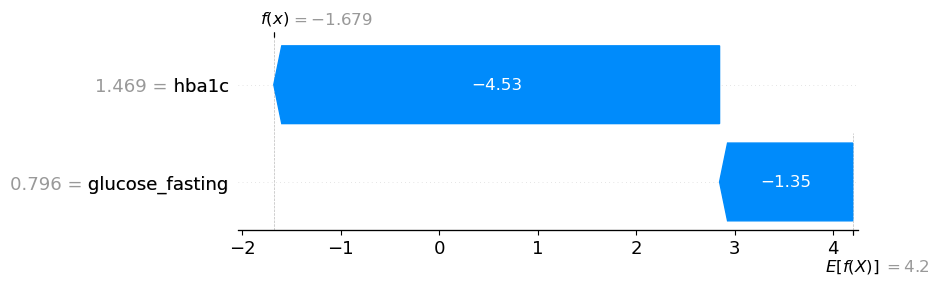

In [11]:
# create a SHAP Explanation object for a single sample and plot the waterfall
idx = 1
base = explainer1.expected_value
# if expected_value is an array (e.g. per-class), use the positive class value
if hasattr(base, "__len__") and len(base) > 1:
	base = base[1]

exp = shap.Explanation(
	values=shap_values1[idx],
	base_values=base,
	data=X_test1.iloc[idx].values,
	feature_names=list(X_test1.columns)
)

shap.plots.waterfall(exp)

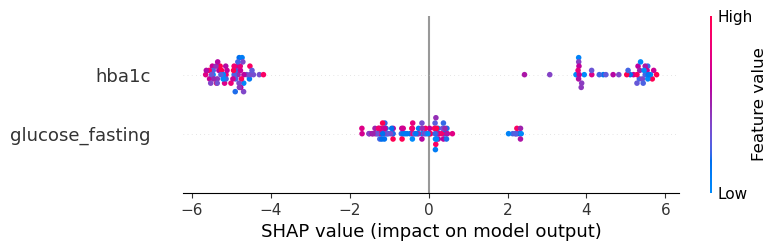

: 

In [ ]:
idx = list(range(1, 100))
base = explainer1.expected_value

if hasattr(base, "__len__") and len(base) > 1:
	base = base[1]

exp = shap.Explanation(
	values=shap_values1[idx],
	base_values=base,
	data=X_test1.iloc[idx].values,
	feature_names=list(X_test1.columns)
)

shap.plots.beeswarm(exp)

In [ ]:
explainer2 = shap.TreeExplainer(model2, model_output="probability", feature_perturbation="tree_path_dependent", approximate=True)

The kernel keeps crashing. We will retrain the models.